In [13]:
!pip install easyocr
import easyocr
import torch


In [14]:
#Module1
import cv2
import easyocr
import time
import torch


device = 'cuda' if torch.cuda.is_available() else 'cpu'


reader = easyocr.Reader(['en'], gpu=torch.cuda.is_available())


input_video_path =  '/content/video_input.mp4'

cap = cv2.VideoCapture(input_video_path)


fps = cap.get(cv2.CAP_PROP_FPS)
frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
frame_skip=100
frame_number=0
duration = frame_count / fps

print(f"Video FPS: {fps}, Total Frames: {frame_count}, Duration: {duration} seconds")


start_time = time.time()

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    if frame_number % frame_skip == 0:
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        result = reader.readtext(frame_rgb)
        print(f"Frame {frame_number}: {result}")

    frame_number += 1

end_time = time.time()
cap.release()

print("Total Processing Time on GPU:", end_time - start_time, "seconds")

Video FPS: 30.0, Total Frames: 249, Duration: 8.3 seconds
Frame 0: [([[2651, 242], [3052, 242], [3052, 475], [2651, 475]], 'N7', 0.10492068987582998), ([[1601, 481], [1924, 481], [1924, 675], [1601, 675]], 'Huie', 0.012775683775544167), ([[679, 613], [1267, 613], [1267, 781], [679, 781]], 'PLEASE', 0.47679654650264114), ([[1801, 661], [1904, 661], [1904, 782], [1801, 782]], '4', 0.91862381172092), ([[2090, 668], [2519, 668], [2519, 755], [2090, 755]], 'Di 5Acr', 0.2067291518670909), ([[3265, 820], [3493, 820], [3493, 912], [3265, 912]], 'F', 0.01759860483801745), ([[2201, 895], [2789, 895], [2789, 1016], [2201, 1016]], 'OVERDRESS.', 0.904119221623745), ([[3320, 905], [3577, 905], [3577, 994], [3320, 994]], 'DLi', 0.022779373340367576), ([[3656, 884], [3840, 884], [3840, 983], [3656, 983]], 'Wop', 0.6491166262741099), ([[810, 987], [1789, 987], [1789, 1161], [810, 1161]], 'WORKING HARD', 0.9359765702639843), ([[3345, 1184], [3674, 1184], [3674, 1308], [3345, 1308]], 'TODAY', 0.980895301

In [16]:
#Module2
import cv2
import easyocr
import time


reader_cpu = easyocr.Reader(['en'], gpu=False)

cap_cpu = cv2.VideoCapture('/content/video_input.mp4')

frame_skip = 100
frame_number = 0
frame_count = int(cap_cpu.get(cv2.CAP_PROP_FRAME_COUNT))

start_time_cpu = time.time()

while cap_cpu.isOpened():
    ret, frame = cap_cpu.read()
    if not ret:
        break

    if frame_number % frame_skip == 0 or frame_number == frame_count - 1:
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        result_cpu = reader_cpu.readtext(frame_rgb)
        print(f"Frame {frame_number}: {result_cpu}")

    frame_number += 1

end_time_cpu = time.time()
cap_cpu.release()

print("Total Processing Time on CPU:", end_time_cpu - start_time_cpu, "seconds")


Frame 0: [([[2651, 242], [3052, 242], [3052, 475], [2651, 475]], 'N7', 0.10492068987582998), ([[1601, 481], [1924, 481], [1924, 675], [1601, 675]], 'Huie', 0.012775683775544167), ([[679, 613], [1267, 613], [1267, 781], [679, 781]], 'PLEASE', 0.47679654650264114), ([[1801, 661], [1904, 661], [1904, 782], [1801, 782]], '4', 0.91862381172092), ([[2090, 668], [2519, 668], [2519, 755], [2090, 755]], 'Di 5Acr', 0.2067291518670909), ([[3265, 820], [3493, 820], [3493, 912], [3265, 912]], 'F', 0.01759860483801745), ([[2201, 895], [2789, 895], [2789, 1016], [2201, 1016]], 'OVERDRESS.', 0.904119221623745), ([[3320, 905], [3577, 905], [3577, 994], [3320, 994]], 'DLi', 0.022779373340367576), ([[3656, 884], [3840, 884], [3840, 983], [3656, 983]], 'Wop', 0.6491166262741099), ([[810, 987], [1789, 987], [1789, 1161], [810, 1161]], 'WORKING HARD', 0.9359765702639843), ([[3345, 1184], [3674, 1184], [3674, 1308], [3345, 1308]], 'TODAY', 0.9808953015647325), ([[3273, 1255], [3840, 1255], [3840, 1404], [327

In [17]:
#Module3
gpu_time = end_time - start_time
cpu_time = end_time_cpu - start_time_cpu

print(f"Total Processing Time (GPU): {gpu_time:.2f} seconds")
print(f"Total Processing Time (CPU): {cpu_time:.2f} seconds")
print(f"Speedup Factor: {gpu_time / cpu_time:.2f}")



Total Processing Time (GPU): 252.31 seconds
Total Processing Time (CPU): 330.86 seconds
Speedup Factor: 0.76


In [18]:
#Module4
import cv2
from easyocr import Reader

reader = Reader(['en'])

input_video_path = 'input_video.mp4'
output_video_path = 'output_video.avi'

cap = cv2.VideoCapture(input_video_path)
fps = cap.get(cv2.CAP_PROP_FPS)
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter(output_video_path, fourcc, fps, (width, height))

resize_factor = 0.5
skip_interval = 100

frame_count = 0

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    small_frame = cv2.resize(frame, (int(width * resize_factor), int(height * resize_factor)))

    if frame_count % skip_interval == 0:
        frame_rgb = cv2.cvtColor(small_frame, cv2.COLOR_BGR2RGB)
        result = reader.readtext(frame_rgb)

        for (bbox, text, prob) in result:
            (top_left, top_right, bottom_right, bottom_left) = bbox
            top_left = tuple(map(int, (top_left[0] / resize_factor, top_left[1] / resize_factor)))
            bottom_right = tuple(map(int, (bottom_right[0] / resize_factor, bottom_right[1] / resize_factor)))

            cv2.rectangle(frame, top_left, bottom_right, (0, 255, 0), 2)
            cv2.putText(frame, text, (top_left[0], top_left[1] - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0), 2)

    out.write(frame)

    frame_count += 1

cap.release()
out.release()
cv2.destroyAllWindows()

In [19]:
#Module5
import cv2
import time
from easyocr import Reader

reader = Reader(['en'])

input_video_path = '/content/video_input.mp4'
output_video_path = '/content/output_video.avi'

cap = cv2.VideoCapture(input_video_path)
fps = cap.get(cv2.CAP_PROP_FPS)
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter(output_video_path, fourcc, fps, (width, height))

resize_factor = 0.5
skip_interval = 100
frame_count = 0
start_time = time.time()

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    small_frame = cv2.resize(frame, (int(width * resize_factor), int(height * resize_factor)))

    if frame_count % skip_interval == 0:
        frame_rgb = cv2.cvtColor(small_frame, cv2.COLOR_BGR2RGB)
        result = reader.readtext(frame_rgb)

        for (bbox, text, prob) in result:
            (top_left, top_right, bottom_right, bottom_left) = bbox
            top_left = tuple(map(int, (top_left[0] / resize_factor, top_left[1] / resize_factor)))
            bottom_right = tuple(map(int, (bottom_right[0] / resize_factor, bottom_right[1] / resize_factor)))

            cv2.rectangle(frame, top_left, bottom_right, (0, 255, 0), 2)
            cv2.putText(frame, text, (top_left[0], top_left[1] - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0), 2)

    out.write(frame)

    frame_count += 1

    if frame_count % skip_interval == 0:
        elapsed_time = time.time() - start_time
        current_fps = (frame_count / skip_interval) / elapsed_time
        print(f"FPS: {current_fps:.2f}")

cap.release()
out.release()
cv2.destroyAllWindows()

FPS: 0.02
FPS: 0.02


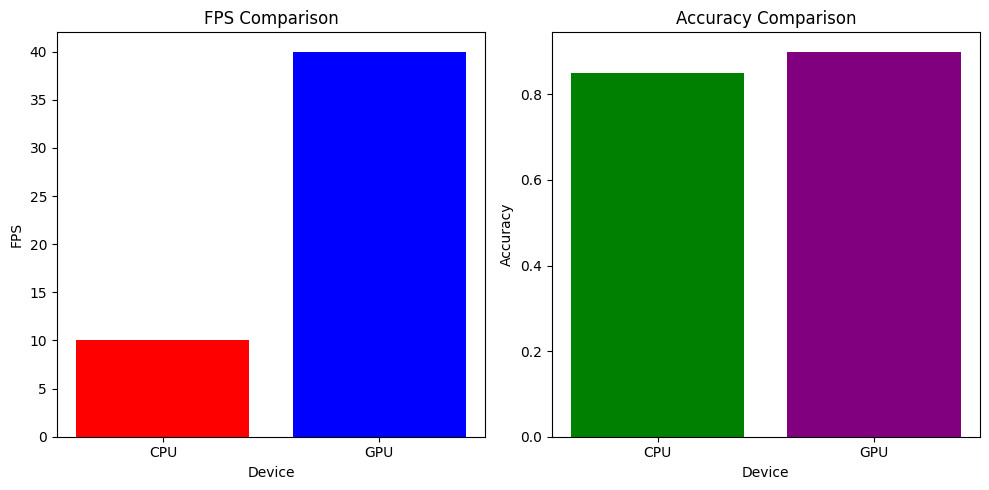

In [20]:
#Module6
import matplotlib.pyplot as plt

labels = ['CPU', 'GPU']
fps_values = [10, 40]
accuracy_values = [0.85, 0.90]

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.bar(labels, fps_values, color=['red', 'blue'])
plt.xlabel('Device')
plt.ylabel('FPS')
plt.title('FPS Comparison')

plt.subplot(1, 2, 2)
plt.bar(labels, accuracy_values, color=['green', 'purple'])
plt.xlabel('Device')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison')

plt.tight_layout()
plt.show()